<a href="https://colab.research.google.com/github/darkskindesigner/GGE-6102-QA-in-Geomatics/blob/QA-in-Geomatics/Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Modules for Filtering and Result Visualisation**

In [5]:
#import libraries
import numpy as np
from scipy.ndimage import gaussian_filter
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal

#Import library used in performing Discrete Fourier transform for LSSA
from scipy.fft import fft, ifft
from scipy.fftpack import fft, fftfreq, ifft


## **Import / Load Data**

In [13]:
#Importing data
from google.colab import files


uploaded = files.upload()

Saving 962002Data1.csv to 962002Data1 (3).csv


In [14]:
# Load data
data = pd.read_csv('962002Data1.csv')

# Get the column names to identify
column_names = data.columns
print(column_names)

Index(['Date(YYYY-MM-DD)', ' North', ' East', ' Vertical', ' Horizonal',
       ' Status '],
      dtype='object')


In [15]:
#Convert date to datetime format
data['Date(YYYY-MM-DD)'] = pd.to_datetime(data['Date(YYYY-MM-DD)'])

## **Gaussian Filtering**

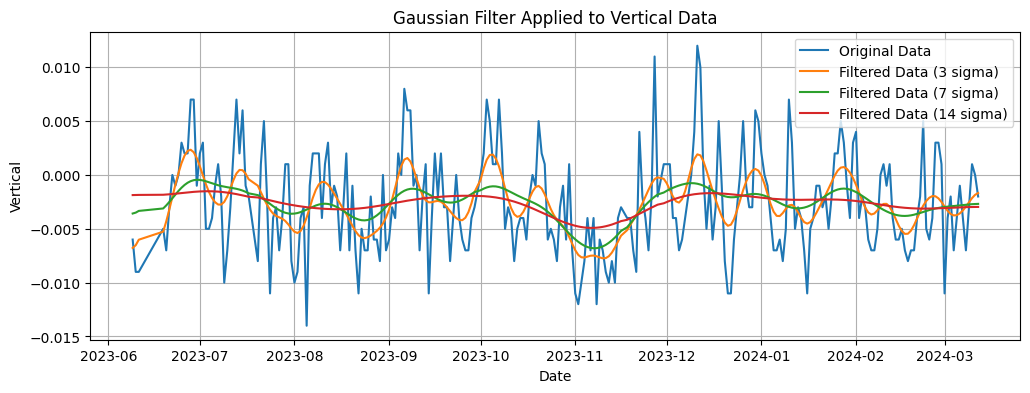

In [16]:
# Define sigma values for Gaussian filter
sigmas = [3.0, 7.0, 14.0]  # sigma values of the Gaussian kernel

# Apply Gaussian filter
for sigma in sigmas:
    data[f'filtered_vertical_sigma_{sigma}'] = gaussian_filter(data[' Vertical'], sigma=sigma)

# Plot the original and filtered data
plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original Data')
for sigma in sigmas:
    plt.plot(data['Date(YYYY-MM-DD)'], data[f'filtered_vertical_sigma_{sigma}'], label=f'Filtered Data ({int(sigma)} sigma)')
plt.xlabel('Date')
plt.ylabel('Vertical')
plt.title(f'Gaussian Filter Applied to Vertical Data')
plt.grid(True)
plt.legend()
plt.show()

## **Filtering with LSSA using specific time periods.**



### LSSA 7 days or lower period filtering


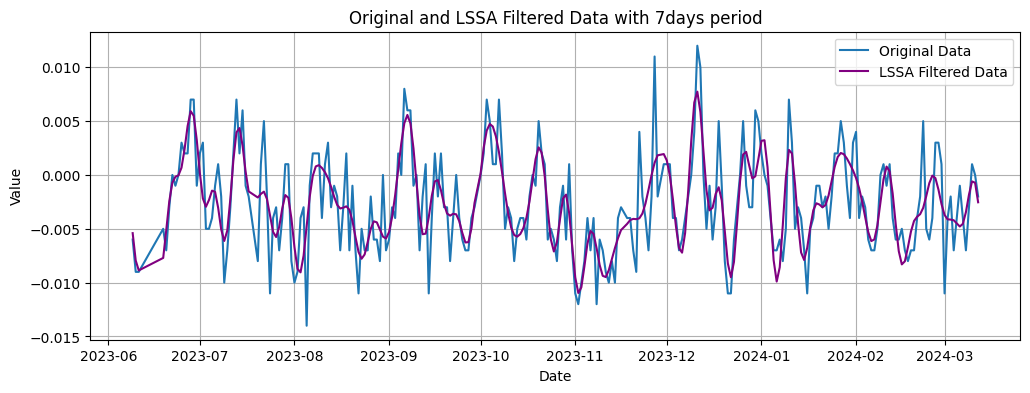

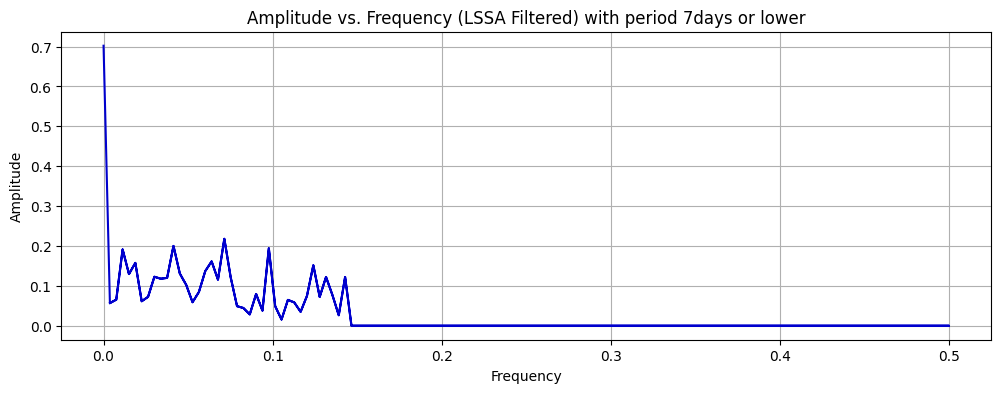

In [17]:
#Extract time series data for dataframe
time_series_7 = data[' Vertical']

#Compute the Discrete Fourier Transform (DFT)
frequency_spectrum = np.fft.fft(time_series_7)
frequency_axis_7 = np.fft.fftfreq(len(time_series_7))

#Filter out frequency components corresponding to periods longer than 7 days
period = 7  #Period in days
sampling_rate = 1  #Data sampled daily
frequency_cutoff_7 = 1 / period  #Frequency corresponding to the period

#Identify indices corresponding to frequencies longer than 7 days
indices_to_filter = np.abs(frequency_axis_7) > frequency_cutoff_7

#Set these frequency components to zero to filter them out
frequency_spectrum[indices_to_filter] = 0

#Inverse Discrete Fourier Transform (IDFT) to obtain filtered time series
filtered_time_series_new7 = np.fft.ifft(frequency_spectrum).real

#Update DataFrame column with filtered data
data['filtered_value_newlssa7'] = filtered_time_series_new7

# Plot original and filtered data
plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original Data')
plt.plot(data['Date(YYYY-MM-DD)'], data['filtered_value_newlssa7'], color= 'purple', label='LSSA Filtered Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and LSSA Filtered Data with 7days period')
plt.legend()
plt.grid(True)
plt.show()

# Plot of amplitude vs. frequency of the filtered frequency spectrum
plt.figure(figsize=(12, 4))
plt.plot(np.abs(frequency_axis_7), np.abs(frequency_spectrum), color = 'mediumblue')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs. Frequency (LSSA Filtered) with period 7days or lower')
plt.grid(True)
plt.show()



### LSSA 14 days or lower period filtering


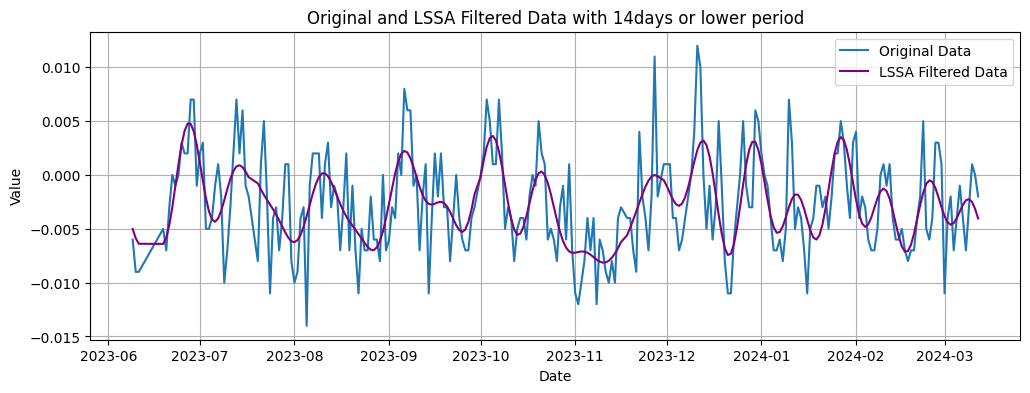

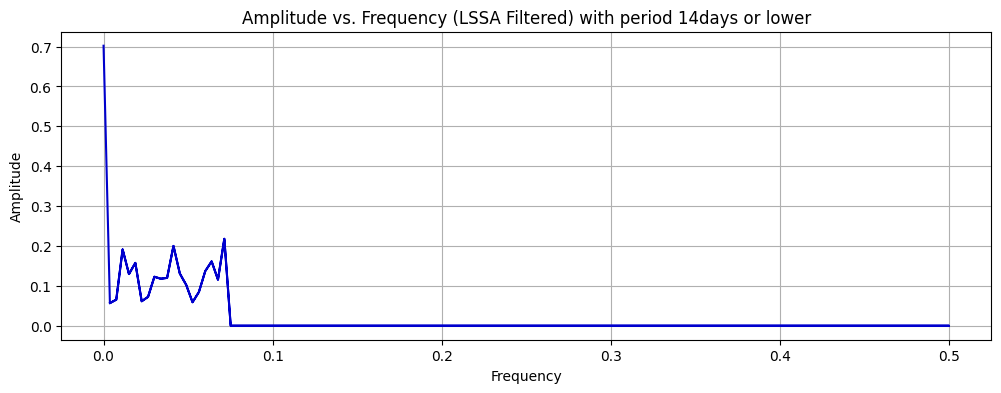

In [18]:
#Extract time series data for dataframe
time_series_14 = data[' Vertical']

#Compute the Discrete Fourier Transform (DFT)
frequency_spectrum = np.fft.fft(time_series_14)
frequency_axis_14 = np.fft.fftfreq(len(time_series_14))

#Filter out frequency components corresponding to periods longer than 14 days
period = 14  #Period in days
sampling_rate = 1  #Data sampled daily
frequency_cutoff_14 = 1 / period  #Frequency corresponding to the period

#Identify indices corresponding to frequencies longer than 14 days
indices_to_filter_14 = np.abs(frequency_axis_14) > frequency_cutoff_14

#Set these frequency components to zero to filter them out
frequency_spectrum[indices_to_filter_14] = 0

#Inverse Discrete Fourier Transform (IDFT) to obtain filtered time series
filtered_time_series_new14 = np.fft.ifft(frequency_spectrum).real

#Update DataFrame column with filtered data
data['filtered_value_newlssa14'] = filtered_time_series_new14

# Plot original and filtered data
plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original Data')
plt.plot(data['Date(YYYY-MM-DD)'], data['filtered_value_newlssa14'], color= 'purple', label='LSSA Filtered Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and LSSA Filtered Data with 14days or lower period')
plt.legend()
plt.grid(True)
plt.show()

# Plot of amplitude vs. frequency of the filtered frequency spectrum
plt.figure(figsize=(12, 4))
plt.plot(np.abs(frequency_axis_14), np.abs(frequency_spectrum), color = 'mediumblue')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs. Frequency (LSSA Filtered) with period 14days or lower')
plt.grid(True)
plt.show()

### LSSA 8 days or higher period filtering

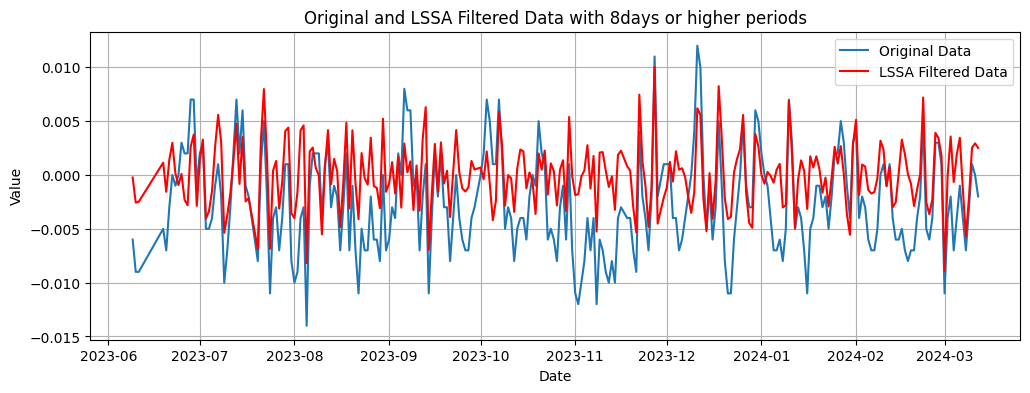

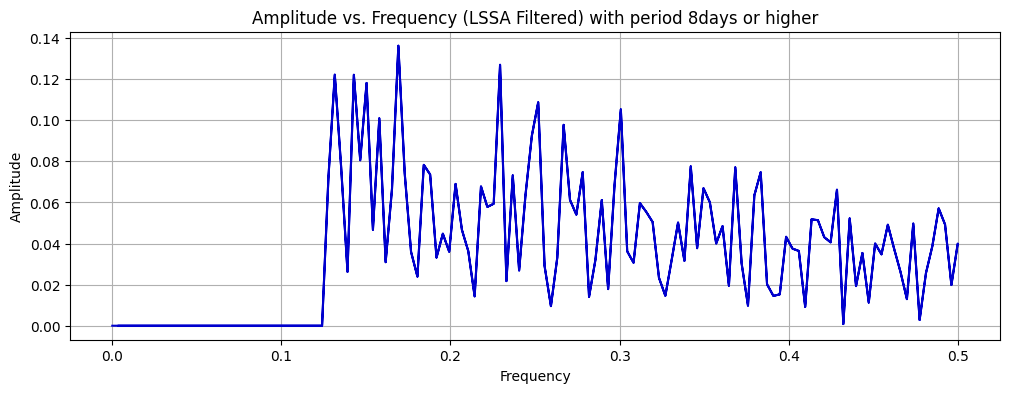

In [19]:
#Time series compute in first LSSA 7days period
#Compute the Discrete Fourier Transform (DFT)
frequency_spectrum_8 = np.fft.fft(time_series_7)
frequency_axis_8 = np.fft.fftfreq(len(time_series_7))

#Filter out frequency components corresponding to periods shorter than 8 days
period = 8  #Period in days
sampling_rate = 1  #Data sampled daily
frequency_cutoff_8 = 1 / period  #Frequency corresponding to the period

#Identify indices corresponding to frequencies shorter than 8 days
indices_to_filter_8 = np.abs(frequency_axis_8) < frequency_cutoff_8

#Set these frequency components to zero to filter them out
frequency_spectrum_8[indices_to_filter_8] = 0

#Inverse Discrete Fourier Transform (IDFT) to obtain filtered time series
filtered_time_series_new8 = np.fft.ifft(frequency_spectrum_8).real

#Update DataFrame column with filtered data
data['filtered_value_newlssa8'] = filtered_time_series_new8

# Plot original and filtered data
plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original Data')
plt.plot(data['Date(YYYY-MM-DD)'], data['filtered_value_newlssa8'], color= 'red', label='LSSA Filtered Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and LSSA Filtered Data with 8days or higher periods')
plt.legend()
plt.grid(True)
plt.show()

# Plot of amplitude vs. frequency of the filtered frequency spectrum
plt.figure(figsize=(12, 4))
plt.plot(np.abs(frequency_axis_8), np.abs(frequency_spectrum_8), color = 'mediumblue')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs. Frequency (LSSA Filtered) with period 8days or higher')
plt.grid(True)
plt.show()

### LSSA 15 days and higher

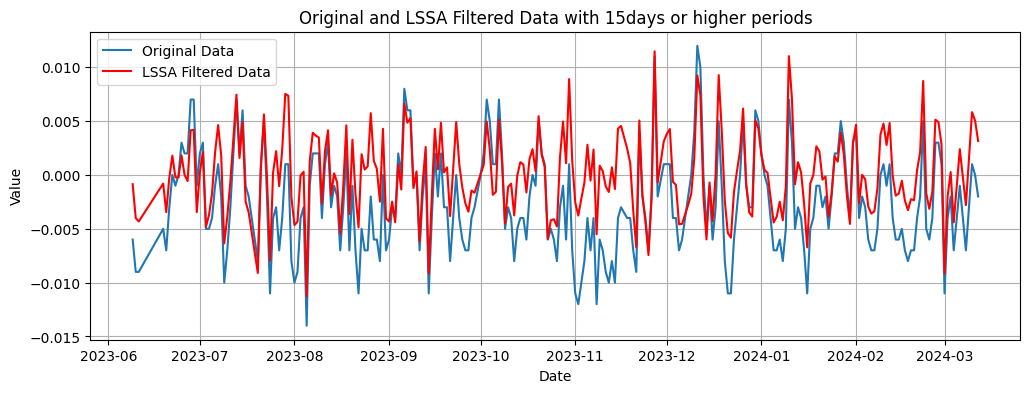

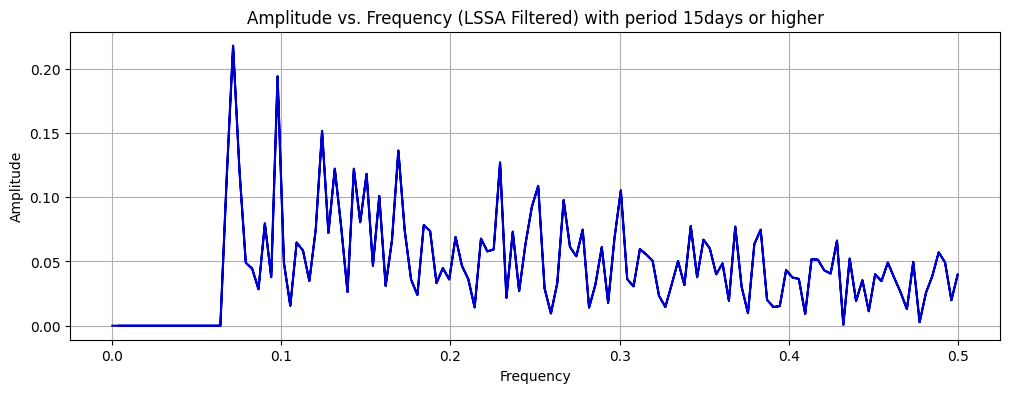

In [20]:

#Compute the Discrete Fourier Transform (DFT)
frequency_spectrum_15 = np.fft.fft(time_series_7)
frequency_axis_15 = np.fft.fftfreq(len(time_series_7))

#Filter out frequency components corresponding to periods shorter than 15 days
period = 15  #Period in days
sampling_rate = 1  #Data sampled daily
frequency_cutoff_15 = 1 / period  #Frequency corresponding to the period

#Identify indices corresponding to frequencies shorter than 15 days
indices_to_filter_15 = np.abs(frequency_axis_15) < frequency_cutoff_15

#Set these frequency components to zero to filter them out
frequency_spectrum_15[indices_to_filter_15] = 0

#Inverse Discrete Fourier Transform (IDFT) to obtain filtered time series
filtered_time_series_new15 = np.fft.ifft(frequency_spectrum_15).real

#Update DataFrame column with filtered data
data['filtered_value_newlssa15'] = filtered_time_series_new15

# Plot original and filtered data
plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original Data')
plt.plot(data['Date(YYYY-MM-DD)'], data['filtered_value_newlssa15'], color= 'red', label='LSSA Filtered Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and LSSA Filtered Data with 15days or higher periods')
plt.legend()
plt.grid(True)
plt.show()

# Plot of amplitude vs. frequency of the filtered frequency spectrum
plt.figure(figsize=(12, 4))
plt.plot(np.abs(frequency_axis_15), np.abs(frequency_spectrum_15), color = 'mediumblue')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs. Frequency (LSSA Filtered) with period 15days or higher')
plt.grid(True)
plt.show()

### LSSA 10 to 40 days inclusive

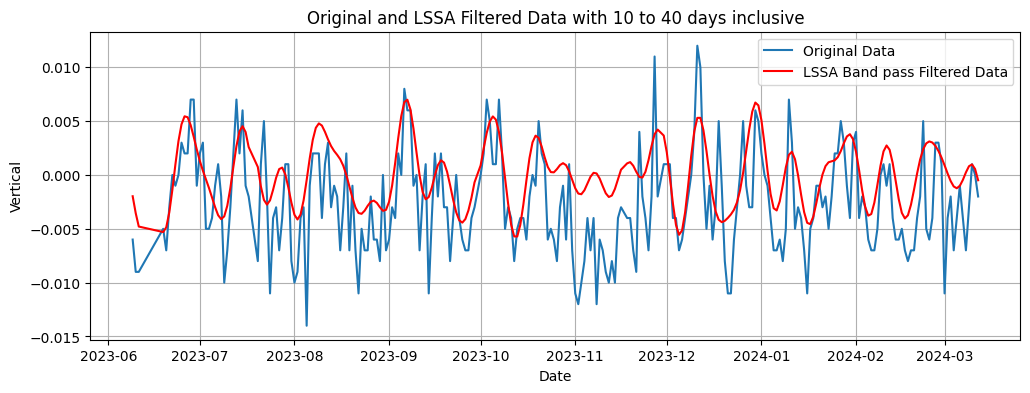

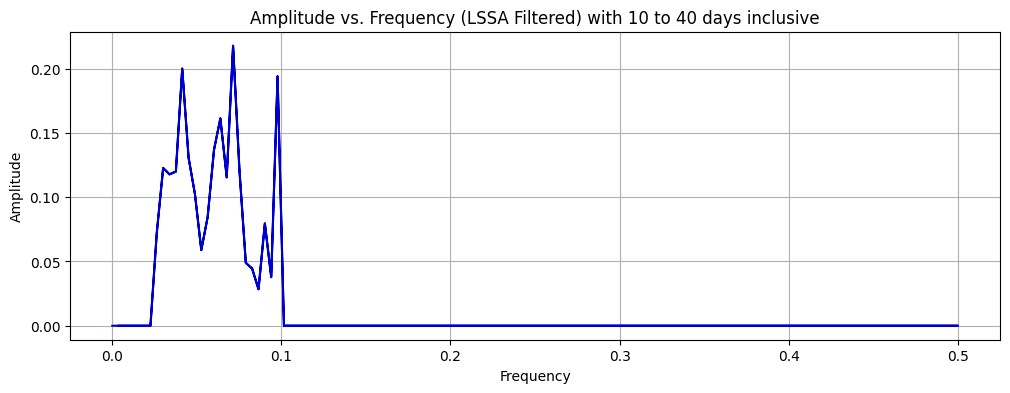

In [21]:
#Compute the Discrete Fourier Transform (DFT)
frequency_spectrum_10_40 = np.fft.fft(time_series_7)
frequency_axis_10_40 = np.fft.fftfreq(len(time_series_7))

#Filter out frequency components corresponding to periods outside 10 to 40 days
period_min = 10  # Minimum period in days
period_max = 40  # Maximum period in days
sampling_rate = 1  #Data is sampled daily
frequency_cutoff_min = 1 / period_max  # Frequency corresponding to the maximum period
frequency_cutoff_max = 1 / period_min  # Frequency corresponding to the minimum period

# Identify indices corresponding to frequencies outside the specified range
indices_to_filter_10_40 = np.logical_or(np.abs(frequency_axis_10_40) < frequency_cutoff_min,
                                  np.abs(frequency_axis_10_40) > frequency_cutoff_max)

# Set these frequency components to zero to filter them out
frequency_spectrum_10_40[indices_to_filter_10_40] = 0

# Inverse Discrete Fourier Transform (IDFT) to obtain filtered time series
filtered_time_series_new10_40 = np.fft.ifft(frequency_spectrum_10_40).real

# Update DataFrame column with filtered data
data['filtered_value_lssa10_40'] = filtered_time_series_new10_40

# Plot original and filtered data
plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original Data')
plt.plot(data['Date(YYYY-MM-DD)'], data['filtered_value_lssa10_40'], color= 'red', label='LSSA Band pass Filtered Data')
plt.xlabel('Date')
plt.ylabel('Vertical')
plt.title('Original and LSSA Filtered Data with 10 to 40 days inclusive')
plt.legend()
plt.grid(True)
plt.show()

# Plot of amplitude vs. frequency of the filtered frequency spectrum
plt.figure(figsize=(12, 4))
plt.plot(np.abs(frequency_axis_10_40), np.abs(frequency_spectrum_10_40), color = 'mediumblue')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs. Frequency (LSSA Filtered) with 10 to 40 days inclusive')
plt.grid(True)
plt.show()

## **Moving Average (Simple Moving Average) Filtering with windows**y

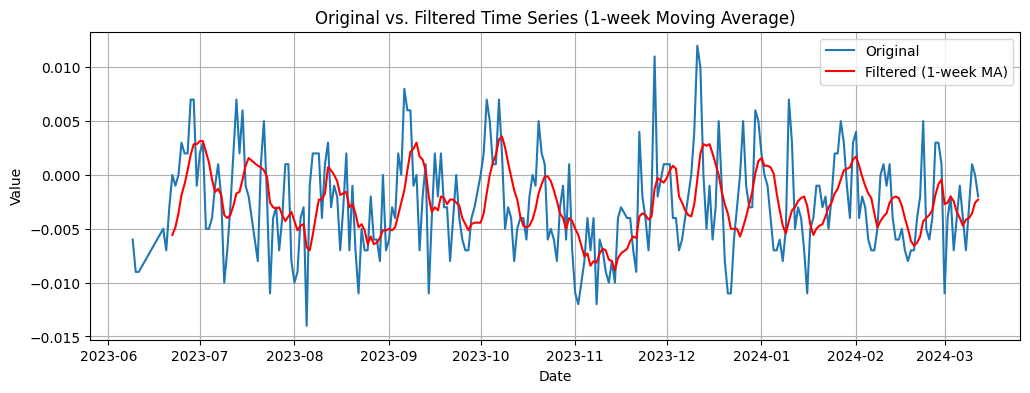

In [26]:
#Date format has been converted to datetime format previously

#Calculate the rolling mean with a window of 1 week
filtered_values_7D = data[' Vertical'].rolling(7).mean()

#Create a new DataFrame with filtered values
filtered_df_7D = pd.DataFrame({'date_column': data['Date(YYYY-MM-DD)'], 'filtered_values_7D': filtered_values_7D})

#Plot the original and filtered time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original')
plt.plot(filtered_df_7D['date_column'], filtered_df_7D['filtered_values_7D'], color = 'red', label='Filtered (1-week MA)')
plt.title('Original vs. Filtered Time Series (1-week Moving Average)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

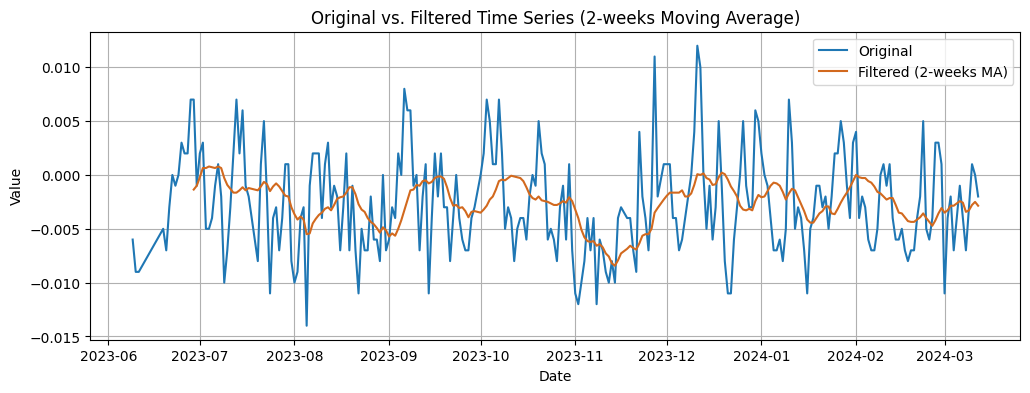

In [27]:
#Date format has been converted to datetime format previously

#Calculate the rolling mean with a window of 2 weeks
filtered_values_14D = data[' Vertical'].rolling(14).mean()

#Create a new DataFrame with filtered values
filtered_df_14D = pd.DataFrame({'date_column': data['Date(YYYY-MM-DD)'], 'filtered_values_14D': filtered_values_14D})

#Plot the original and filtered time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original')
plt.plot(filtered_df_14D['date_column'], filtered_df_14D['filtered_values_14D'], color = 'chocolate', label='Filtered (2-weeks MA)')
plt.title('Original vs. Filtered Time Series (2-weeks Moving Average)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

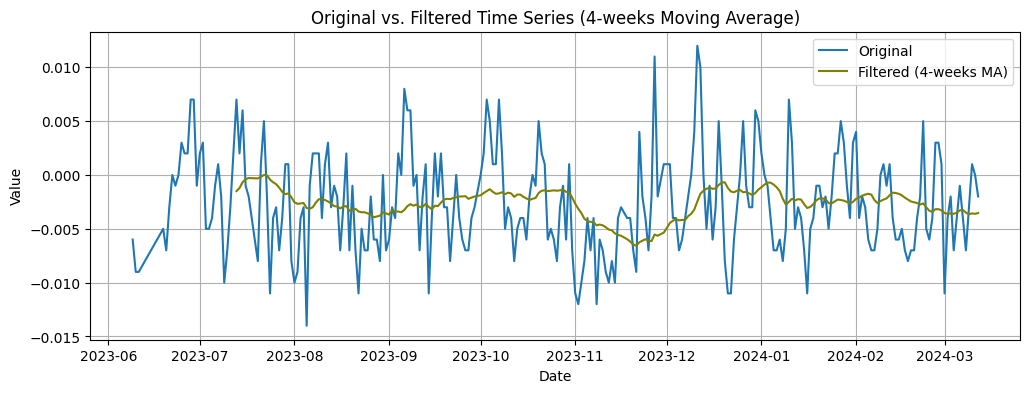

In [28]:
#Date format has been converted to datetime format previously

#Calculate the rolling mean with a window of 4 weeks
filtered_values_28D = data[' Vertical'].rolling(28).mean()

#Create a new DataFrame with filtered values
filtered_df_28D = pd.DataFrame({'date_column': data['Date(YYYY-MM-DD)'], 'filtered_values_28D': filtered_values_28D})

#Plot the original and filtered time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original')
plt.plot(filtered_df_28D['date_column'], filtered_df_28D['filtered_values_28D'], color = 'olive', label='Filtered (4-weeks MA)')
plt.title('Original vs. Filtered Time Series (4-weeks Moving Average)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

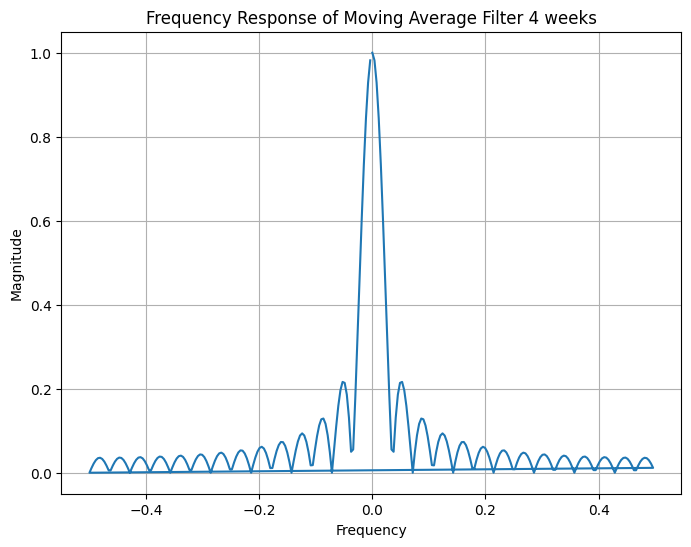

In [29]:
# Function to compute moving average filter
def moving_average_filter(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()

window_size  = 28

# Apply moving average filter to the DataFrame
data['moving_avg_filtered_7'] = moving_average_filter(data[' Vertical'], window_size)

# Compute frequency response of the moving average filter
impulse_response = np.ones(window_size) / window_size
frequency_response_7 = np.abs(np.fft.fft(impulse_response, len(data['moving_avg_filtered_7'])))

# Frequency axis
frequency_axis = np.fft.fftfreq(len(data['moving_avg_filtered_7']))

# Plot amplitude response (magnitude of frequency response)
plt.figure(figsize=(8, 6))
plt.plot(frequency_axis, frequency_response_7)
plt.title('Frequency Response of Moving Average Filter 4 weeks')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

## **Simple FIR Filtering with 25%, 50% and 75% gains**

In [30]:
# First determine FIR cofficients used in simple FIR moving average filter

# Function to calculate FIR coefficients for a simple moving average filter
def calculate_fir_coefficients(window_type, filter_order):
    window = scipy.signal.windows.boxcar(filter_order)
    coefficients = window / np.sum(window)
    return coefficients

# Example parameters
window_type = 'boxcar'  #  window type = provides the simplest design with equal weight to all samples within the window.
filter_order = 14  # filter order is determined by desied window length = 14 days of the moving average window

# Calculate FIR coefficients
fir_coefficients = calculate_fir_coefficients(window_type, filter_order)

print("FIR Coefficients:", fir_coefficients)

FIR Coefficients: [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]


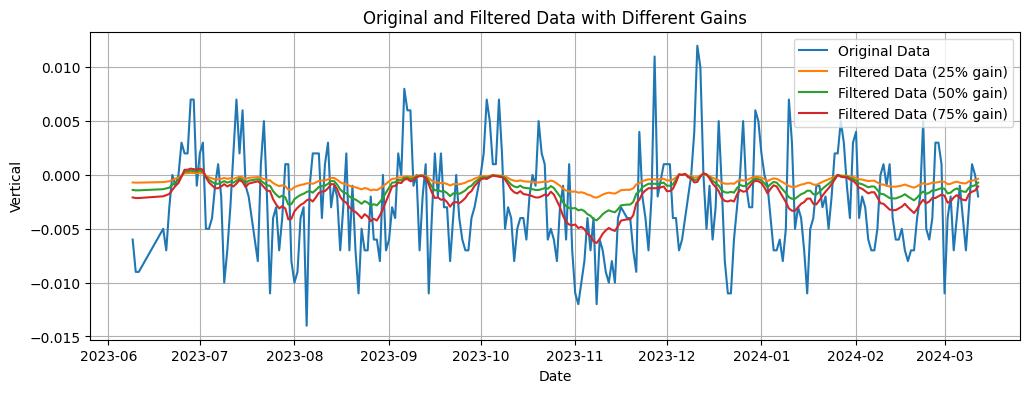

In [31]:
# Define gains
gains = [0.25, 0.5, 0.75]

# Function to apply FIR filter with different gains
def apply_fir_filter(data, fir_coefficients, gain):
    filtered_data_gain = np.convolve(data, fir_coefficients, mode='same') * gain
    return filtered_data_gain

# Apply FIR filter with different gains to DataFrame column
for gain in gains:
    data[f'gain_filtered_value_{int(gain * 100)}'] = apply_fir_filter(data[' Vertical'], fir_coefficients, gain)

# Print the DataFrame with filtered values

# Apply FIR filter with different gains to DataFrame column
for gain in gains:
    data[f'filtered_gain_value_{int(gain * 100)}'] = apply_fir_filter(data[' Vertical'], fir_coefficients, gain)

# Plot original and filtered data for each gain
plt.figure(figsize=(12, 4))
plt.plot(data['Date(YYYY-MM-DD)'], data[' Vertical'], label='Original Data')
for gain in gains:
    plt.plot(data['Date(YYYY-MM-DD)'], data[f'filtered_gain_value_{int(gain * 100)}'], label=f'Filtered Data ({int(gain * 100)}% gain)')
plt.xlabel('Date')
plt.ylabel('Vertical')
plt.title('Original and Filtered Data with Different Gains')
plt.legend()
plt.grid(True)
plt.show()


##**Analysis of Filtering Results**




**1. What periodic trends can you identify in the data? What are their apparent frequencies and amplitudes?**
All filters tend to smooth out the frequency fluctuations of the vertical coordinates time-dependent data, with the Gaussian and Moving Average filter removing more periodic trends based on increase in the standard deviation value (sigma) and window size respectively. These filters tend to smoothing out data more as compared to LSSA filtering which still retains more periods. The FIR moving filter with gains has similar frequency periods across all 3 gains with each filtered gain result having different magnitudes. The magnitude tends to increase with gain increase.

**2. What are the strengths and weaknesses of each type of filter?**
**Simple Moving Average filters** work with already available or stored data so are not efficient in processing real-time data but are effective smoothing out data making them optimal in reducing noise within a dataset. **FIR filters** are simple to implement.
**Gaussian filters** are optimal in removing gaussian noise and the degree of smoothing results can be easily controlled by sigma adjustments, but they tend to reduce or blur out detials from the data being processed. **Least square spectral analysis filtering** does not require the dataset for filtering to be equally spaced or be manipulated before analysis, that is it can handle gaps in the dataset, unlike the other aforementioned filters that are developed restrictively to handle completely equal sampled datasets.  

**3. For the filters in 1 and 3, how are the parameters of the filter related to the period of signals retained and filtered out?**
For the Gaussian Filter adjustments made to sigma parameter leads to change in signals filtered out and retained, this also holds true for the Moving Average filter when the window size is adjusted based on analysis requirements. An increase in window size or sigma parameters filters out or removes more periods, thus smoothening the signals frequency, retaining fewer cycles.


**4. Describe a hypothetical situation where you would want to use a low pass, band pass, and high pass filter.**


*  **High pass filter** can be applied in making satellite images sharper so as to reveal more local detials and information. For example; in the case of delineating the boundary between various landuse/landcover types in satellite image. This convulation filter sharpens the edges between objects in an image, thus enhancing the object edges, making the objects more visible. Such filtering process works well if the original satellite image is not too noisy, if not the noise tends to be amplified in the image when processed with a high pass filter. With this application on images it is also referred to as an edge enhancement filter.
*   **Low pass filter** can be implemented as a spatial filter in removing "noise" (extreme values) from a satellite imagery and smoothing a digital elevation model (DEM) raster. In the case of a raster imagery, it smooths out the noise bringing out faint detials which the noise smothered. It is the opposite of high pass filter.

*  **Band pass filter** is applied in LIDAR sensors as an interference filter having a narrow bandwidth to isolate returning signals. They select signals within a specific bandwidth. image enhancement there is interest in revealing local detial and reducing noise in an image silmutaneously.






